In [ ]:
#First->Load the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

print(df.shape)
print(df.info())
df.head()


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


             Missing Values  Percentage (%)
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


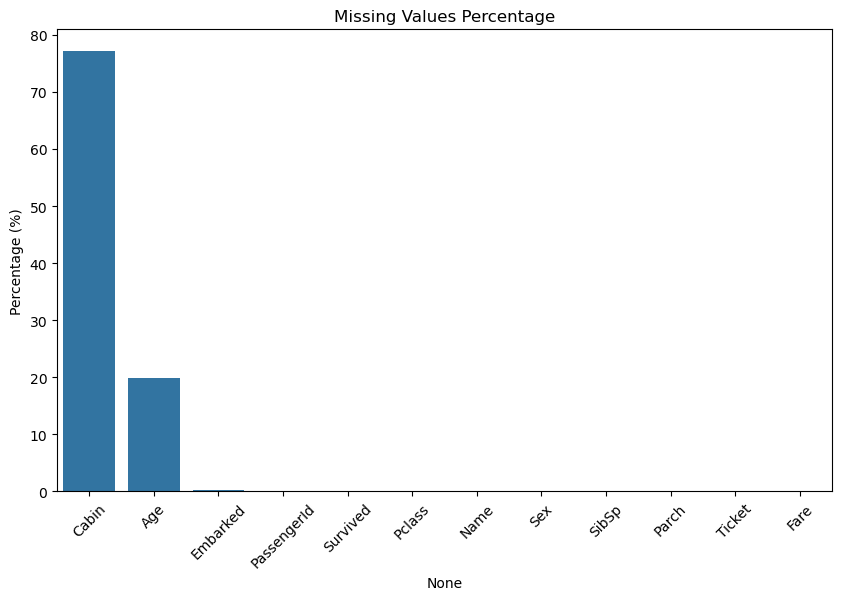

In [ ]:
#We check->Missing Value
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
print(missing_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df['Percentage (%)'])
plt.xticks(rotation=45)
plt.title('Missing Values Percentage')
plt.show()


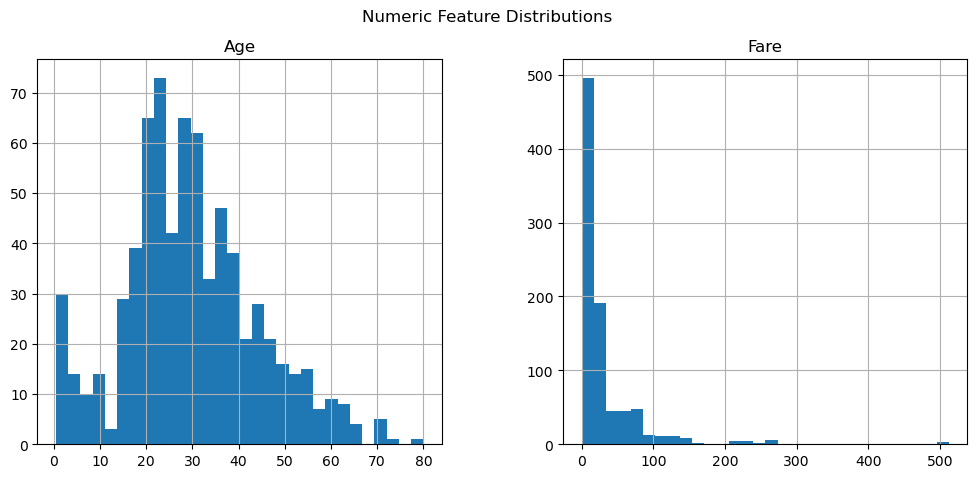

In [ ]:
#check-Distrubution
df[['Age', 'Fare']].hist(bins=30, figsize=(12, 5))
plt.suptitle('Numeric Feature Distributions')
plt.show()


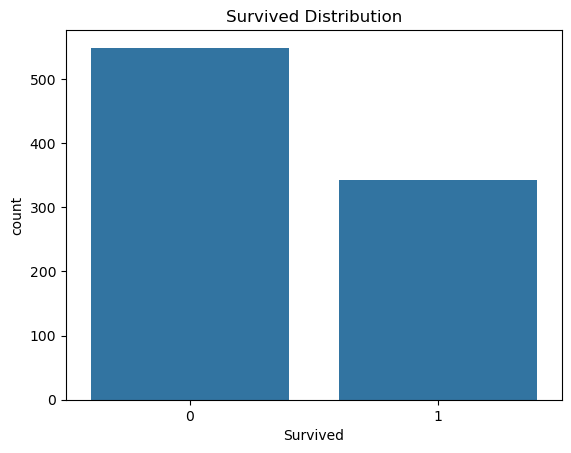

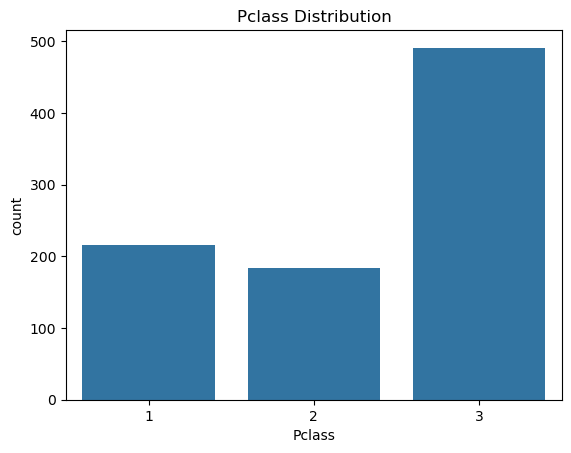

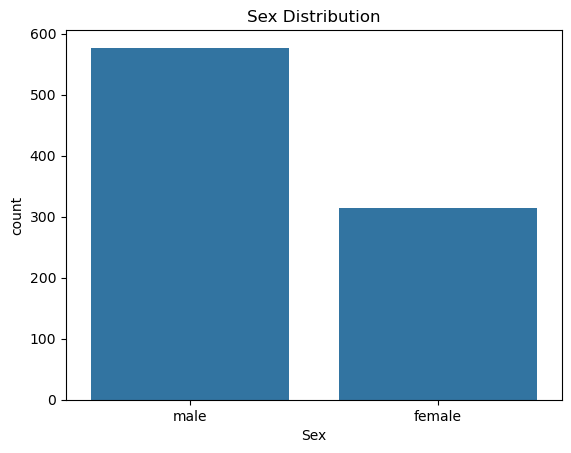

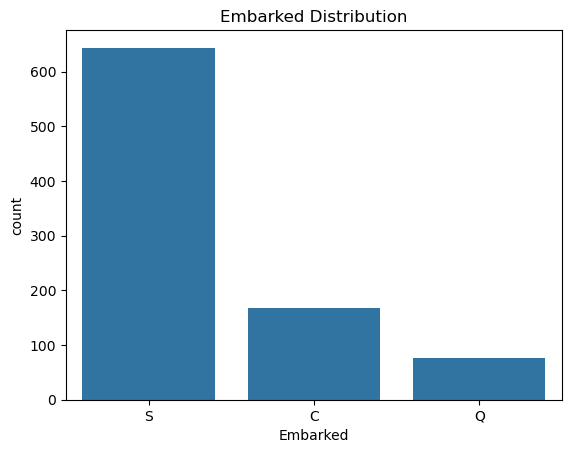

In [ ]:
#Category->We Check the Dataset Distrubution
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()


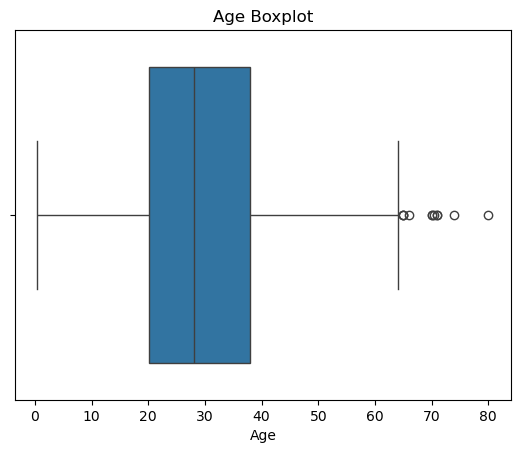

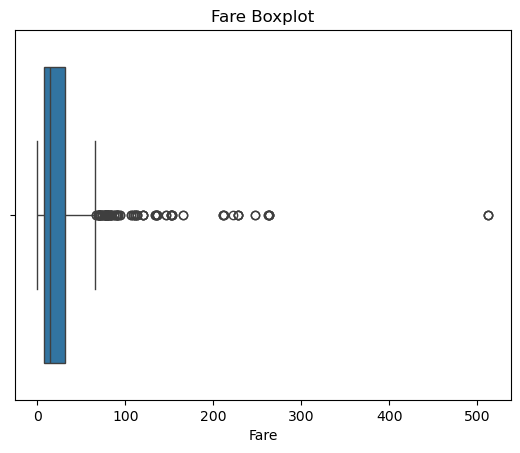

In [5]:
for col in ['Age', 'Fare']:
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.show()


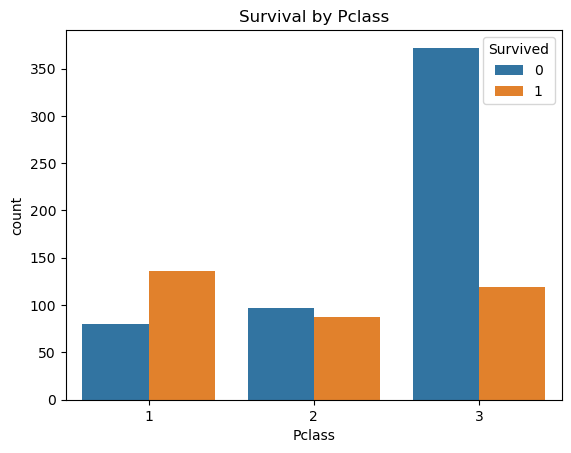

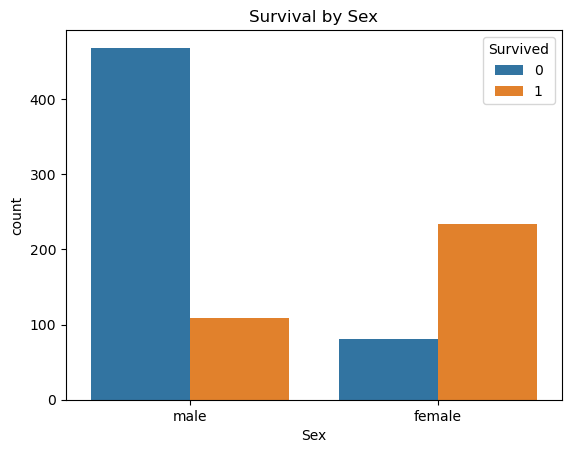

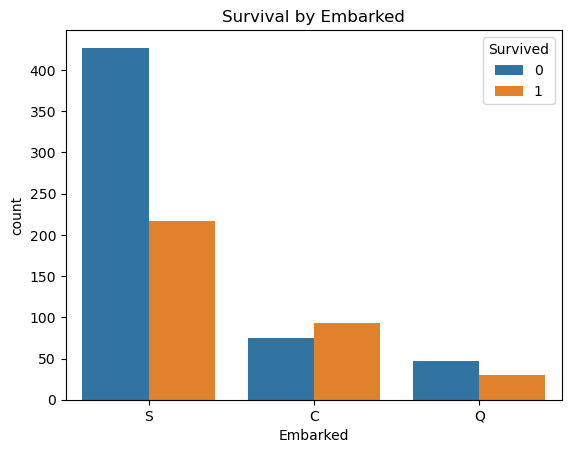

In [6]:
for col in ['Pclass', 'Sex', 'Embarked']:
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'Survival by {col}')
    plt.show()


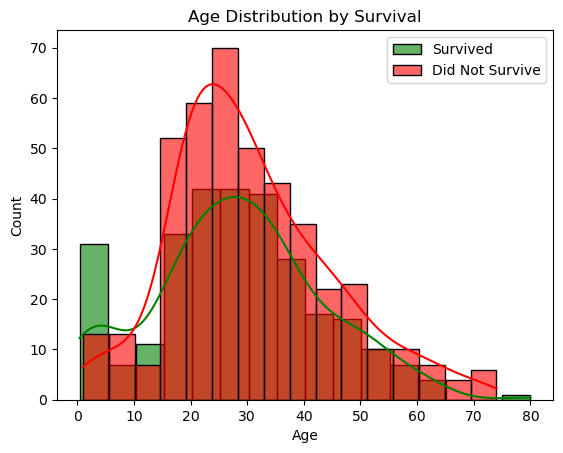

In [7]:
sns.histplot(df[df['Survived']==1]['Age'], kde=True, color='green', label='Survived', alpha=0.6)
sns.histplot(df[df['Survived']==0]['Age'], kde=True, color='red', label='Did Not Survive', alpha=0.6)
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()


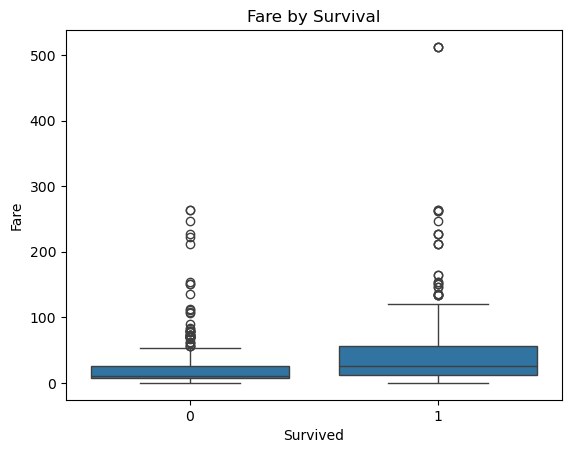

In [8]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.show()


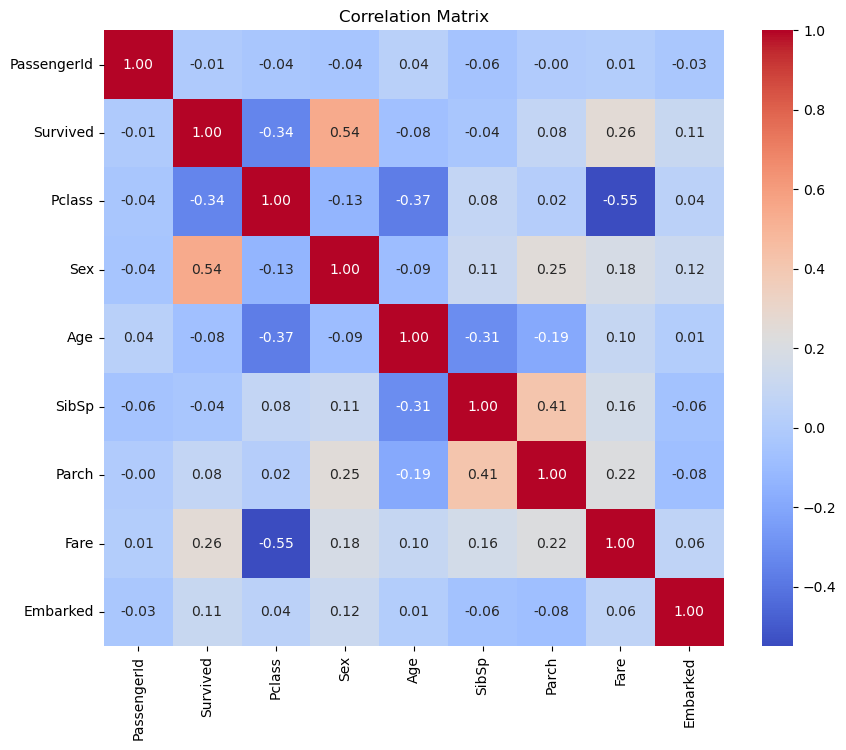

In [12]:
df_corr = df.copy()
df_corr['Sex'] = df_corr['Sex'].map({'male': 0, 'female': 1})
df_corr['Embarked'] = df_corr['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

numeric_df = df_corr.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


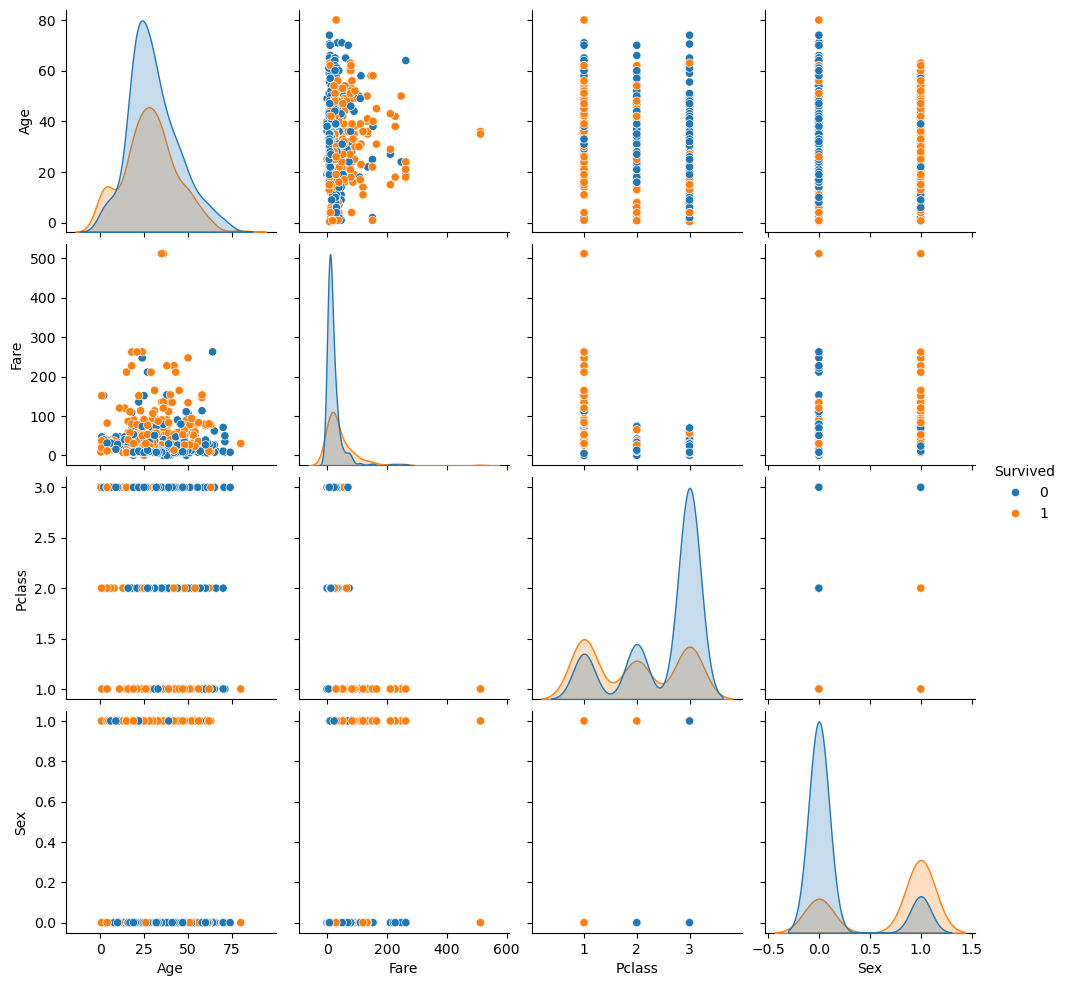

In [10]:
sns.pairplot(df_corr, vars=['Age', 'Fare', 'Pclass', 'Sex'], hue='Survived')
plt.show()
